In [43]:
#Data import and manipulation
import numpy as np
import pandas as pd

#For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting and modelling the dataset
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Checking the performance of the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('./day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df.drop(columns="instant", inplace=True)

In [7]:
# Transforming the date column to date type
df['dteday'] = pd.to_datetime(df['dteday'])

In [9]:
daily_data_last_30_days = df[(df['dteday'])> pd.Timestamp('12-01-2012')]
daily_data_last_30_days.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
701,2012-12-02,4,1,12,0,0,0,2,0.347500,0.359208,0.823333,0.124379,892,3757,4649
702,2012-12-03,4,1,12,0,1,1,1,0.452500,0.455796,0.767500,0.082721,555,5679,6234
703,2012-12-04,4,1,12,0,2,1,1,0.475833,0.469054,0.733750,0.174129,551,6055,6606
704,2012-12-05,4,1,12,0,3,1,1,0.438333,0.428012,0.485000,0.324021,331,5398,5729
705,2012-12-06,4,1,12,0,4,1,1,0.255833,0.258204,0.508750,0.174754,340,5035,5375


In [10]:
daily_data_without_last_30_days = df[(df['dteday']) <= pd.Timestamp('12-01-2012')]
daily_data_without_last_30_days.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


In [8]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
df.duplicated().sum()

0

# Univariate Analysis

<AxesSubplot: xlabel='yr', ylabel='cnt'>

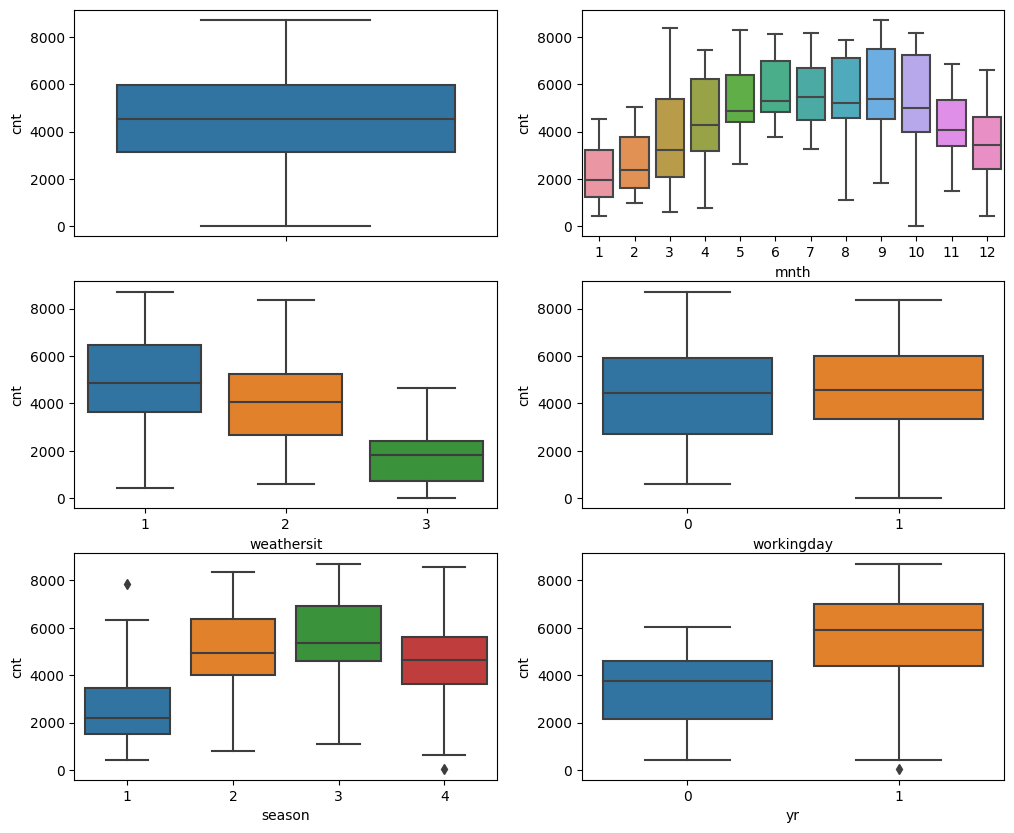

In [13]:
figure, axes = plt.subplots(nrows = 3, ncols = 2)
figure.set_size_inches(12, 10)

sns.boxplot(data = df, y = 'cnt', orient = 'v', ax = axes[0,0])
sns.boxplot(data = df, y = 'cnt', x = 'mnth', orient = 'v', ax = axes[0,1])
sns.boxplot(data = df, y = 'cnt', x = 'weathersit', orient = 'v', ax = axes[1,0])
sns.boxplot(data = df, y = 'cnt', x = 'workingday', orient = 'v', ax = axes[1,1])
sns.boxplot(data = df, y = 'cnt', x = 'season', orient = 'v', ax = axes[2,0])
sns.boxplot(data = df, y = 'cnt', x = 'yr', orient = 'v', ax = axes[2,1])

<AxesSubplot: xlabel='cnt', ylabel='Density'>

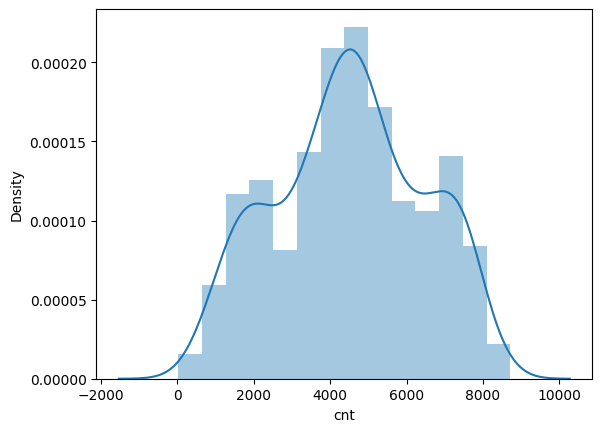

In [16]:
sns.distplot(df['cnt'])

In [17]:
max_rentals_per_bike = 12
df['nmax'] = round(df['cnt']/max_rentals_per_bike)+1

In [18]:
df['n95'] = round(df['cnt']*.95/max_rentals_per_bike + 1)

In [19]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,nmax,n95
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,83.0,79.0
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,68.0,64.0
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,113.0,108.0
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,131.0,125.0
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,134.0,128.0


In [25]:
categry_features = ['season', 'holiday', 'mnth', 'weekday', 'workingday', 'weathersit']
number_features = ['temp', 'atemp','hum', 'windspeed']

features = categry_features + number_features
target = ['cnt']

<AxesSubplot: >

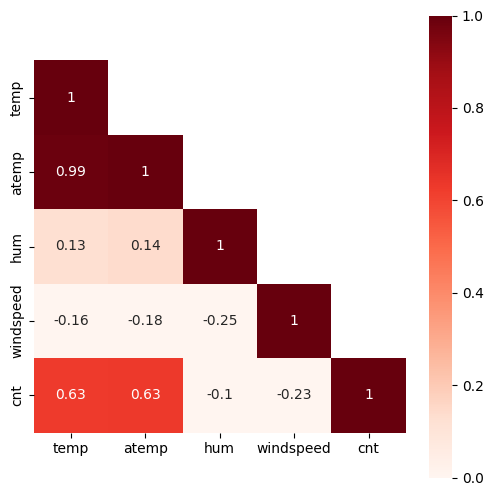

In [26]:
matrix = df[number_features + target].corr()
heat = np.array(matrix)

heat[np.tril_indices_from(heat)] = False
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
sns.heatmap(matrix, mask = heat, vmax = 1.0, vmin = 0.0, square = True, annot = True, cmap = "Reds")

In [27]:
features.remove('atemp')

In [29]:
X_train = df[features].values

In [36]:
y_train = df[target].values.ravel() #flattening the array data

In [37]:
val = daily_data_last_30_days.sort_values(by=target)

In [38]:
X_val = val[features].values
y_val = val[target].values.ravel()

In [39]:
len(y_val)

30

In [65]:
model11 = RandomForestRegressor(random_state = 42, n_estimators = 100)
model11.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [66]:
pred = model11.predict(X_train)

In [67]:
mse = mean_squared_error(y_train, pred)
score = model11.score(X_train, y_train)
score

0.9444299817361822

In [68]:
pred1 = model11.predict(X_val)

In [46]:
pred1

array([ 817.48, 1264.7 , 1269.66, 1731.54, 1949.97, 1937.43, 1880.22,
       2031.98, 2253.59, 2740.29, 3384.11, 2913.46, 3847.43, 4290.1 ,
       4289.9 , 4126.89, 4631.51, 4796.74, 4442.8 , 4836.12, 5108.42,
       4361.94, 4781.22, 5335.11, 5055.95, 5076.73, 4988.06, 5508.53,
       5563.25, 5933.44])

In [47]:
score1 = model.score(X_val, y_val)

In [48]:
score1

0.9352827015193546

In [49]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

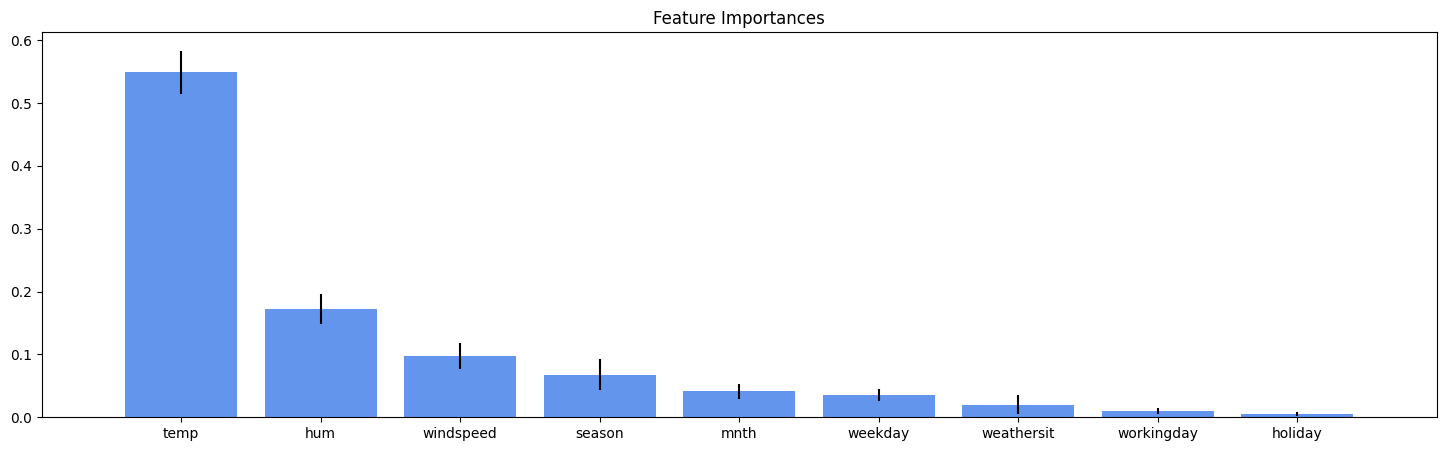

In [50]:
plt.figure(figsize=(18,5))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color = "cornflowerblue", yerr = std[indices], align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices])
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Fine Tuning

In [54]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [55]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [56]:
rf = RandomForestRegressor()
model = RandomizedSearchCV(rf, random_grid, n_iter = 100, cv = 3, verbose = 2, random_state = 0)

In [57]:
model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.0s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   3.3s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   3.2s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   3.8s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.3s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   2.0s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   2.5s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   2.5s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   3.8s
[CV] END bootstrap=False, max_depth=3

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.5s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   6.9s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   6.3s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   6.7s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   3.4s
[CV] END bootstrap=True, max_

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   3.2s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   2.9s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   2.8s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.3s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.3s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.4s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, 

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   4.6s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   5.1s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   4.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   4.2s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   5.3s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   4.2s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   3.4s
[CV] END bootstrap=True, max_dep

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=2)

In [58]:
model00 = model.best_estimator_

In [60]:
model00.fit(X_train, y_train)

RandomForestRegressor(max_features='auto', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=600)

In [61]:
y_pred_train = model00.predict(X_train)

In [62]:
print('mean absolute error:', mean_absolute_error(y_train, y_pred_train))
print('mean squared error:', mean_squared_error(y_train, y_pred_train))
print('root mean squared error:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('r2-score:', r2_score(y_train, y_pred_train))

mean absolute error: 683.6347269778786
mean squared error: 656132.2034035802
root mean squared error: 810.019878400265
r2-score: 0.8249219038817681


In [63]:
y_pred_val = model00.predict(X_val)

In [64]:
print('mean absolute error:', mean_absolute_error(y_val, y_pred_val))
print('mean squared error:', mean_squared_error(y_val, y_pred_val))
print('root mean squared error:', np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('r2-score:', r2_score(y_val, y_pred_val))

mean absolute error: 679.0694135963125
mean squared error: 643129.1927595715
root mean squared error: 801.9533607134342
r2-score: 0.7991482493298596


In [76]:
# Non Hypertuned RandomForestRegressor trained data
y_pred_train_ny = model11.predict(X_train)

In [77]:
print('mean absolute error:', mean_absolute_error(y_train, y_pred_train_ny))
print('mean squared error:', mean_squared_error(y_train, y_pred_train_ny))
print('root mean squared error:', np.sqrt(mean_squared_error(y_train, y_pred_train_ny)))
print('r2-score:', r2_score(y_train, y_pred_train))

mean absolute error: 380.99053351573184
mean squared error: 208257.22540410396
root mean squared error: 456.35208491262966
r2-score: 0.8249219038817681


In [78]:
# Non Hypertuned RandomForestRegressor validation data
y_pred_test_ny = model11.predict(X_val)

In [79]:
print('mean absolute error:', mean_absolute_error(y_val, y_pred_test_ny))
print('mean squared error:', mean_squared_error(y_val, y_pred_test_ny))
print('root mean squared error:', np.sqrt(mean_squared_error(y_val, y_pred_test_ny)))
print('r2-score:', r2_score(y_val, y_pred_test_ny))

mean absolute error: 391.3570000000001
mean squared error: 207225.39779000002
root mean squared error: 455.22016408546756
r2-score: 0.9352827015193546
